#### Name : Janhavi Katre 
#### Roll No : 05

In [ ]:
from numpy.random import rand
from numpy import hstack
from matplotlib import pyplot

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from numpy import zeros
from numpy import ones
from numpy import hstack

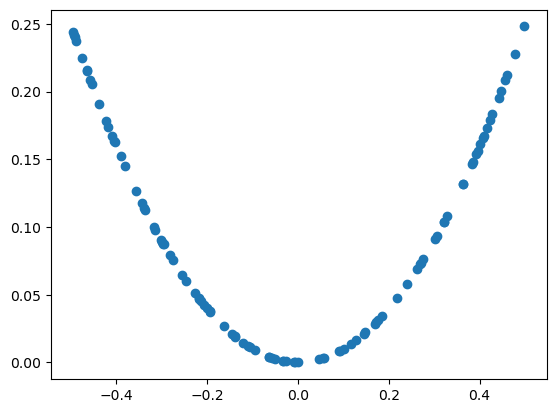

In [ ]:
# generating random samples

def generate_samples(n=100):
 X1 = rand(n) - 0.5
 X2 = X1 * X1
 X1 = X1.reshape(n, 1)
 X2 = X2.reshape(n, 1)
 return hstack((X1, X2))

data = generate_samples()
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

In [ ]:
# Defining the model

def define_discriminator(n_inputs=2):
 model = Sequential()
 model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
 model.add(Dense(1, activation='sigmoid'))
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

In [ ]:
# generating real samples

def generate_real_samples(n):
 X1 = rand(n) - 0.5
 X2 = X1 * X1
 X1 = X1.reshape(n, 1)
 X2 = X2.reshape(n, 1)
 X = hstack((X1, X2))
 y = ones((n, 1))
 return X, y

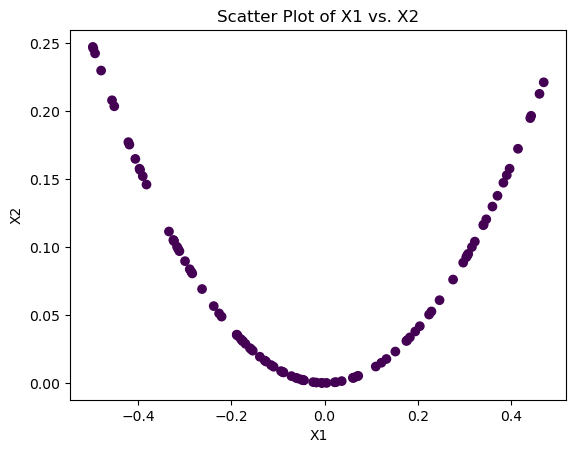

In [ ]:
# Plot Between X1 and X2

data, labels = generate_real_samples(n=100)
pyplot.scatter(data[:, 0], data[:, 1], c=labels.ravel(), cmap='viridis')
pyplot.xlabel('X1')
pyplot.ylabel('X2')
pyplot.title('Scatter Plot of X1 vs. X2')
pyplot.show()

In [ ]:
def generate_fake_samples(n):
 X1 = -1 + rand(n) * 2
 X2 = -1 + rand(n) * 2
 X1 = X1.reshape(n, 1)
 X2 = X2.reshape(n, 1)
 X = hstack((X1, X2))
 y = zeros((n, 1))
 return X, y

In [ ]:
def train_discriminator(model, n_epochs=1000, n_batch=128):
    half_batch = int(n_batch / 2)
    real_accuracy_arr = []
    fake_accuracy_arr = []

    for i in range(n_epochs):

        # real
        X_real, y_real = generate_real_samples(half_batch)
        model.train_on_batch(X_real, y_real)

        # fake
        X_fake, y_fake = generate_fake_samples(half_batch)
        model.train_on_batch(X_fake, y_fake)

        # evaluate the model
        _, realacc = model.evaluate(X_real, y_real, verbose=0)
        _, fakeacc = model.evaluate(X_fake, y_fake, verbose=0)

        print(f"Epoch {i+1}: Real Accuracy = {realacc:.4f}, Fake Accuracy = {fakeacc:.4f}")
        real_accuracy_arr.append(realacc)
        fake_accuracy_arr.append(fakeacc)

    return real_accuracy_arr,fake_accuracy_arr

model = define_discriminator()
real_accuracy_arr,fake_accuracy_arr = train_discriminator(model)


Epoch 1: Real Accuracy = 0.0000, Fake Accuracy = 1.0000
Epoch 2: Real Accuracy = 0.0000, Fake Accuracy = 1.0000
Epoch 3: Real Accuracy = 0.0156, Fake Accuracy = 1.0000
Epoch 4: Real Accuracy = 0.0000, Fake Accuracy = 1.0000
Epoch 5: Real Accuracy = 0.0156, Fake Accuracy = 1.0000
Epoch 6: Real Accuracy = 0.0156, Fake Accuracy = 1.0000
Epoch 7: Real Accuracy = 0.0312, Fake Accuracy = 1.0000
Epoch 8: Real Accuracy = 0.0156, Fake Accuracy = 1.0000
Epoch 9: Real Accuracy = 0.0156, Fake Accuracy = 1.0000
Epoch 10: Real Accuracy = 0.0156, Fake Accuracy = 1.0000
Epoch 11: Real Accuracy = 0.0469, Fake Accuracy = 1.0000
Epoch 12: Real Accuracy = 0.0156, Fake Accuracy = 1.0000
Epoch 13: Real Accuracy = 0.0469, Fake Accuracy = 1.0000
Epoch 14: Real Accuracy = 0.0625, Fake Accuracy = 1.0000
Epoch 15: Real Accuracy = 0.0469, Fake Accuracy = 1.0000
Epoch 16: Real Accuracy = 0.0938, Fake Accuracy = 1.0000
Epoch 17: Real Accuracy = 0.0781, Fake Accuracy = 1.0000
Epoch 18: Real Accuracy = 0.0156, Fake A

Epoch 147: Real Accuracy = 0.4688, Fake Accuracy = 1.0000
Epoch 148: Real Accuracy = 0.6875, Fake Accuracy = 1.0000
Epoch 149: Real Accuracy = 0.5781, Fake Accuracy = 0.9531
Epoch 150: Real Accuracy = 0.6094, Fake Accuracy = 0.9688
Epoch 151: Real Accuracy = 0.5469, Fake Accuracy = 0.9844
Epoch 152: Real Accuracy = 0.5156, Fake Accuracy = 0.9844
Epoch 153: Real Accuracy = 0.5625, Fake Accuracy = 0.9844
Epoch 154: Real Accuracy = 0.6250, Fake Accuracy = 0.9688
Epoch 155: Real Accuracy = 0.5938, Fake Accuracy = 0.9531
Epoch 156: Real Accuracy = 0.5312, Fake Accuracy = 0.9688
Epoch 157: Real Accuracy = 0.7188, Fake Accuracy = 1.0000
Epoch 158: Real Accuracy = 0.7188, Fake Accuracy = 0.9688
Epoch 159: Real Accuracy = 0.7188, Fake Accuracy = 0.9844
Epoch 160: Real Accuracy = 0.6406, Fake Accuracy = 0.9688
Epoch 161: Real Accuracy = 0.7188, Fake Accuracy = 0.9219
Epoch 162: Real Accuracy = 0.6094, Fake Accuracy = 0.9844
Epoch 163: Real Accuracy = 0.6406, Fake Accuracy = 1.0000
Epoch 164: Rea

Epoch 289: Real Accuracy = 0.9219, Fake Accuracy = 0.9531
Epoch 290: Real Accuracy = 0.8750, Fake Accuracy = 0.9219
Epoch 291: Real Accuracy = 0.8906, Fake Accuracy = 0.9531
Epoch 292: Real Accuracy = 0.8438, Fake Accuracy = 0.9219
Epoch 293: Real Accuracy = 0.8750, Fake Accuracy = 0.9688
Epoch 294: Real Accuracy = 0.9219, Fake Accuracy = 0.9844
Epoch 295: Real Accuracy = 0.8281, Fake Accuracy = 0.9531
Epoch 296: Real Accuracy = 0.8906, Fake Accuracy = 0.9531
Epoch 297: Real Accuracy = 0.9062, Fake Accuracy = 0.9531
Epoch 298: Real Accuracy = 0.9219, Fake Accuracy = 0.9375
Epoch 299: Real Accuracy = 0.8281, Fake Accuracy = 0.9375
Epoch 300: Real Accuracy = 0.9062, Fake Accuracy = 0.9219
Epoch 301: Real Accuracy = 0.8750, Fake Accuracy = 0.8906
Epoch 302: Real Accuracy = 0.9531, Fake Accuracy = 0.9531
Epoch 303: Real Accuracy = 0.8438, Fake Accuracy = 0.9219
Epoch 304: Real Accuracy = 0.8906, Fake Accuracy = 0.9688
Epoch 305: Real Accuracy = 0.8438, Fake Accuracy = 0.9219
Epoch 306: Rea

Epoch 433: Real Accuracy = 1.0000, Fake Accuracy = 0.9531
Epoch 434: Real Accuracy = 1.0000, Fake Accuracy = 0.9219
Epoch 435: Real Accuracy = 1.0000, Fake Accuracy = 0.9062
Epoch 436: Real Accuracy = 1.0000, Fake Accuracy = 0.9219
Epoch 437: Real Accuracy = 1.0000, Fake Accuracy = 0.8594
Epoch 438: Real Accuracy = 1.0000, Fake Accuracy = 0.9375
Epoch 439: Real Accuracy = 1.0000, Fake Accuracy = 0.9219
Epoch 440: Real Accuracy = 1.0000, Fake Accuracy = 0.8594
Epoch 441: Real Accuracy = 1.0000, Fake Accuracy = 0.9062
Epoch 442: Real Accuracy = 1.0000, Fake Accuracy = 0.9219
Epoch 443: Real Accuracy = 1.0000, Fake Accuracy = 0.9219
Epoch 444: Real Accuracy = 1.0000, Fake Accuracy = 0.8750
Epoch 445: Real Accuracy = 1.0000, Fake Accuracy = 0.8906
Epoch 446: Real Accuracy = 1.0000, Fake Accuracy = 0.9375
Epoch 447: Real Accuracy = 1.0000, Fake Accuracy = 0.8906
Epoch 448: Real Accuracy = 1.0000, Fake Accuracy = 0.8594
Epoch 449: Real Accuracy = 1.0000, Fake Accuracy = 0.8594
Epoch 450: Rea

Epoch 575: Real Accuracy = 1.0000, Fake Accuracy = 0.9219
Epoch 576: Real Accuracy = 1.0000, Fake Accuracy = 0.7969
Epoch 577: Real Accuracy = 1.0000, Fake Accuracy = 0.8906
Epoch 578: Real Accuracy = 1.0000, Fake Accuracy = 0.8750
Epoch 579: Real Accuracy = 1.0000, Fake Accuracy = 0.9375
Epoch 580: Real Accuracy = 1.0000, Fake Accuracy = 0.8594
Epoch 581: Real Accuracy = 1.0000, Fake Accuracy = 0.8750
Epoch 582: Real Accuracy = 1.0000, Fake Accuracy = 0.9219
Epoch 583: Real Accuracy = 1.0000, Fake Accuracy = 0.8594
Epoch 584: Real Accuracy = 1.0000, Fake Accuracy = 0.9219
Epoch 585: Real Accuracy = 1.0000, Fake Accuracy = 0.8594
Epoch 586: Real Accuracy = 1.0000, Fake Accuracy = 0.8906
Epoch 587: Real Accuracy = 1.0000, Fake Accuracy = 0.8438
Epoch 588: Real Accuracy = 1.0000, Fake Accuracy = 0.8594
Epoch 589: Real Accuracy = 1.0000, Fake Accuracy = 0.8750
Epoch 590: Real Accuracy = 1.0000, Fake Accuracy = 0.9219
Epoch 591: Real Accuracy = 1.0000, Fake Accuracy = 0.7812
Epoch 592: Rea

Epoch 717: Real Accuracy = 1.0000, Fake Accuracy = 0.9062
Epoch 718: Real Accuracy = 1.0000, Fake Accuracy = 0.9219
Epoch 719: Real Accuracy = 1.0000, Fake Accuracy = 0.8281
Epoch 720: Real Accuracy = 1.0000, Fake Accuracy = 0.7812
Epoch 721: Real Accuracy = 1.0000, Fake Accuracy = 0.8906
Epoch 722: Real Accuracy = 1.0000, Fake Accuracy = 0.9219
Epoch 723: Real Accuracy = 1.0000, Fake Accuracy = 0.8594
Epoch 724: Real Accuracy = 1.0000, Fake Accuracy = 0.8438
Epoch 725: Real Accuracy = 1.0000, Fake Accuracy = 0.8906
Epoch 726: Real Accuracy = 1.0000, Fake Accuracy = 0.9062
Epoch 727: Real Accuracy = 1.0000, Fake Accuracy = 0.9375
Epoch 728: Real Accuracy = 1.0000, Fake Accuracy = 0.8750
Epoch 729: Real Accuracy = 1.0000, Fake Accuracy = 0.9219
Epoch 730: Real Accuracy = 1.0000, Fake Accuracy = 0.8594
Epoch 731: Real Accuracy = 1.0000, Fake Accuracy = 0.8594
Epoch 732: Real Accuracy = 1.0000, Fake Accuracy = 0.8906
Epoch 733: Real Accuracy = 1.0000, Fake Accuracy = 0.8750
Epoch 734: Rea

Epoch 859: Real Accuracy = 1.0000, Fake Accuracy = 0.9062
Epoch 860: Real Accuracy = 1.0000, Fake Accuracy = 0.9219
Epoch 861: Real Accuracy = 1.0000, Fake Accuracy = 0.9375
Epoch 862: Real Accuracy = 1.0000, Fake Accuracy = 0.8438
Epoch 863: Real Accuracy = 1.0000, Fake Accuracy = 0.9375
Epoch 864: Real Accuracy = 1.0000, Fake Accuracy = 0.8750
Epoch 865: Real Accuracy = 1.0000, Fake Accuracy = 0.9219
Epoch 866: Real Accuracy = 1.0000, Fake Accuracy = 0.8281
Epoch 867: Real Accuracy = 1.0000, Fake Accuracy = 0.8438
Epoch 868: Real Accuracy = 1.0000, Fake Accuracy = 0.8750
Epoch 869: Real Accuracy = 1.0000, Fake Accuracy = 0.9219
Epoch 870: Real Accuracy = 1.0000, Fake Accuracy = 0.8750
Epoch 871: Real Accuracy = 1.0000, Fake Accuracy = 0.8906
Epoch 872: Real Accuracy = 1.0000, Fake Accuracy = 0.8125
Epoch 873: Real Accuracy = 1.0000, Fake Accuracy = 0.8750
Epoch 874: Real Accuracy = 1.0000, Fake Accuracy = 0.9375
Epoch 875: Real Accuracy = 1.0000, Fake Accuracy = 0.8594
Epoch 876: Rea

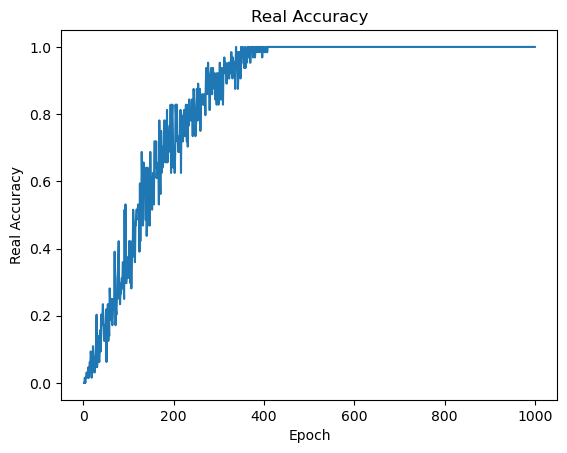

In [ ]:
 # plot between real accuracy and epoch

pyplot.plot(range(1, len(real_accuracy_arr)+1), real_accuracy_arr,)
pyplot.xlabel('Epoch')
pyplot.ylabel('Real Accuracy')
pyplot.title('Real Accuracy')
pyplot.show()

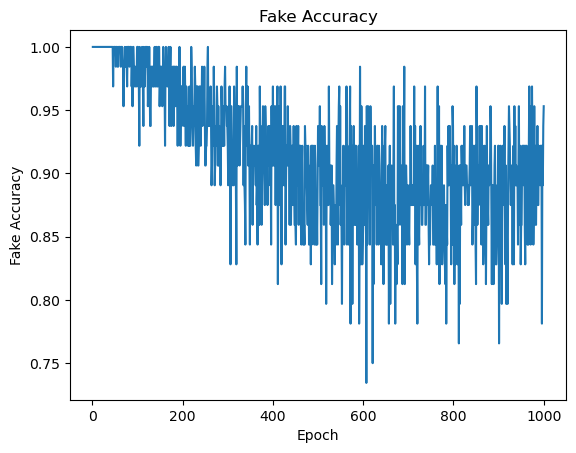

In [ ]:
 # plot between real accuracy and epoch

pyplot.plot(range(1, len(fake_accuracy_arr)+1), fake_accuracy_arr)
pyplot.xlabel('Epoch')
pyplot.ylabel('Fake Accuracy')
pyplot.title('Fake Accuracy')
pyplot.show()